# Animal Sequence Emergence Predictions

For each animal sequence:
1. Compute the HA and NA risk using Emergenet (using pretrained Enets from all human strains within 1 year of the present, **1/1/2023 - 1/1/2024**)
2. Predict IRAT emergence scores with `emergenet.emergenet.predict_irat_emergence`
3. Save results: `results/animal_predictions/animal.csv`

    
### Running Processes

Computations are done in:
- `animal_predictions.py`
- `run_animal_predictions.sh`

To run, navigate to terminal and do

`chmod ugo+rwx run_animal_predictions.sh`

`./run_animal_predictions.sh`

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
from emergenet.emergenet import predict_irat_emergence


RESULT_DIR = 'results/animal_predictions/'

In [2]:
# Get list of all subsets
pattern = 'animal[0-9]*.csv'
file_list = glob.glob(f'{RESULT_DIR}/{pattern}')
animal = pd.DataFrame()
for file in file_list:
    df = pd.read_csv(file)
    animal = pd.concat([animal, df], ignore_index=True)

# Predict emergence risk
animal['geom_mean_risk'] = np.sqrt(animal['ha_risk'] * animal['na_risk'])
animal[['emergence', 'emergence_low', 'emergence_high']] = animal.apply(lambda row: predict_irat_emergence(row['ha_risk'], row['na_risk']), axis=1, result_type='expand')
animal = animal.sort_values(by='emergence', ascending=False).reset_index(drop=True)
animal.to_csv(RESULT_DIR + 'animal.csv', index=False)
animal[['name', 'subtype', 'date', 'emergence']].round(3)

,name,subtype,date,emergence
0,A/swine/Iowa/CEIRS-1495/2023,H1N2,2023-06-15,7.733
1,A/swine/Tver_region/RII-81-1S/2023,H1N1,2023-02-17,7.733
2,A/swine/Missouri/A02524408/2023,H3N2,2023-01-13,7.733
3,A/swine/North_Carolina/A02751333/2022,H3N2,2022-12-13,7.733
4,A/swine/Indiana/A01812310/2020,H1N1,2020-08-17,7.732
...,...,...,...,...
6349,A/chicken/China/2106/2021,H9N2,2021-11-30,3.054
6350,A/chicken/China/2034/2020,H9N2,2020-01-20,3.050
6351,A/chicken/China/2040/2020,H9N2,2020-01-10,3.050
6352,A/green-winged-teal/Georgia/DT-22246/2020,H5N8,2020-09-29,3.046


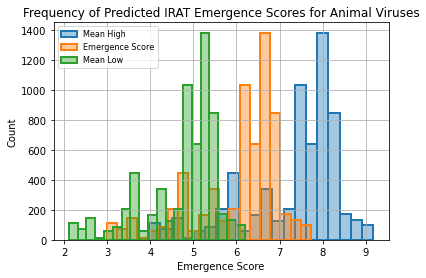

In [3]:
sns.histplot(animal['emergence_high'], label='Mean High', alpha=0.4, color='#1f77b4', linewidth=2, edgecolor='#1f77b4', bins=20)
sns.histplot(animal['emergence'], label='Emergence Score', alpha=0.4, color='#ff7f0e', linewidth=2, edgecolor='#ff7f0e', bins=20)
sns.histplot(animal['emergence_low'], label='Mean Low', alpha=0.4, color='#2ca02c', linewidth=2, edgecolor='#2ca02c', bins=20)

plt.xlabel('Emergence Score')
plt.title('Frequency of Predicted IRAT Emergence Scores for Animal Viruses')
plt.grid()
plt.legend(fontsize=8)
plt.savefig('tables/animal.png',bbox_inches='tight',transparent=True);

## Combine Animal + IRAT

Add a dummy column to the animal predictions, indicating whether the sequence is from IRAT.

In [20]:
irat = pd.read_csv('results/irat_predictions/irat.csv')
irat_with_accessions = pd.read_csv('data/irat.csv')[['Influenza Virus', 'HA Accession', 'NA Accession']]
irat = irat.merge(irat_with_accessions, on='Influenza Virus', how='left')
animal = pd.read_csv('results/animal_predictions/animal.csv')
irat['is_irat'] = 1
animal['is_irat'] = 0
irat = irat[['Influenza Virus', 'Virus Type', 'Date of Risk Assessment',
             'HA Accession', 'HA Sequence', 'NA Accession', 'NA Sequence', 
             'HA Risk', 'NA Risk', 'Geom Mean Risk', 'Predicted Emergence',
             'Predicted Emergence Low', 'Predicted Emergence High',
             'is_irat', 'Emergence Score', 'Impact Score',
             'Mean Low Acceptable Emergence', 'Mean High Acceptable Emergence',
             'Mean Low Acceptable Impact', 'Mean High Acceptable Impact',]]

irat.columns = list(animal.columns) + ['emergence_score', 'impact_score', 
                                       'mean_low_acceptable_emergence', 'mean_high_acceptable_emergence', 
                                       'mean_low_acceptable_impact', 'mean_high_acceptable_impact']
combined = pd.concat([irat, animal], ignore_index=True)
combined.to_csv(RESULT_DIR + 'animal_combined_with_irat.csv', index=False)

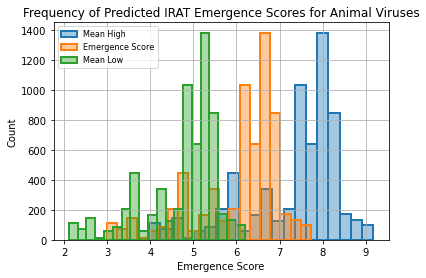

In [4]:
sns.histplot(animal['emergence_high'], label='Mean High', alpha=0.4, color='#1f77b4', linewidth=2, edgecolor='#1f77b4', bins=20)
sns.histplot(animal['emergence'], label='Emergence Score', alpha=0.4, color='#ff7f0e', linewidth=2, edgecolor='#ff7f0e', bins=20)
sns.histplot(animal['emergence_low'], label='Mean Low', alpha=0.4, color='#2ca02c', linewidth=2, edgecolor='#2ca02c', bins=20)

plt.xlabel('Emergence Score')
plt.title('Frequency of Predicted IRAT Emergence Scores for Animal Viruses')
plt.grid()
plt.legend(fontsize=8)
plt.savefig('tables/animal.png',bbox_inches='tight',transparent=True);

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [genextreme] [0.23 sec] [RSS: 3.33654e+06] [loc=0.000 scale=0.000]
[distfit] >INFO> [gumbel_r  ] [0.00 sec] [RSS: 337581] [loc=0.001 scale=0.001]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Gumbel_R(loc:0.000657, scale:0.001058)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngumbel_r(loc=0.000657465, scale=0.00105823)'}, xlabel='Values', ylabel='Frequency'>)

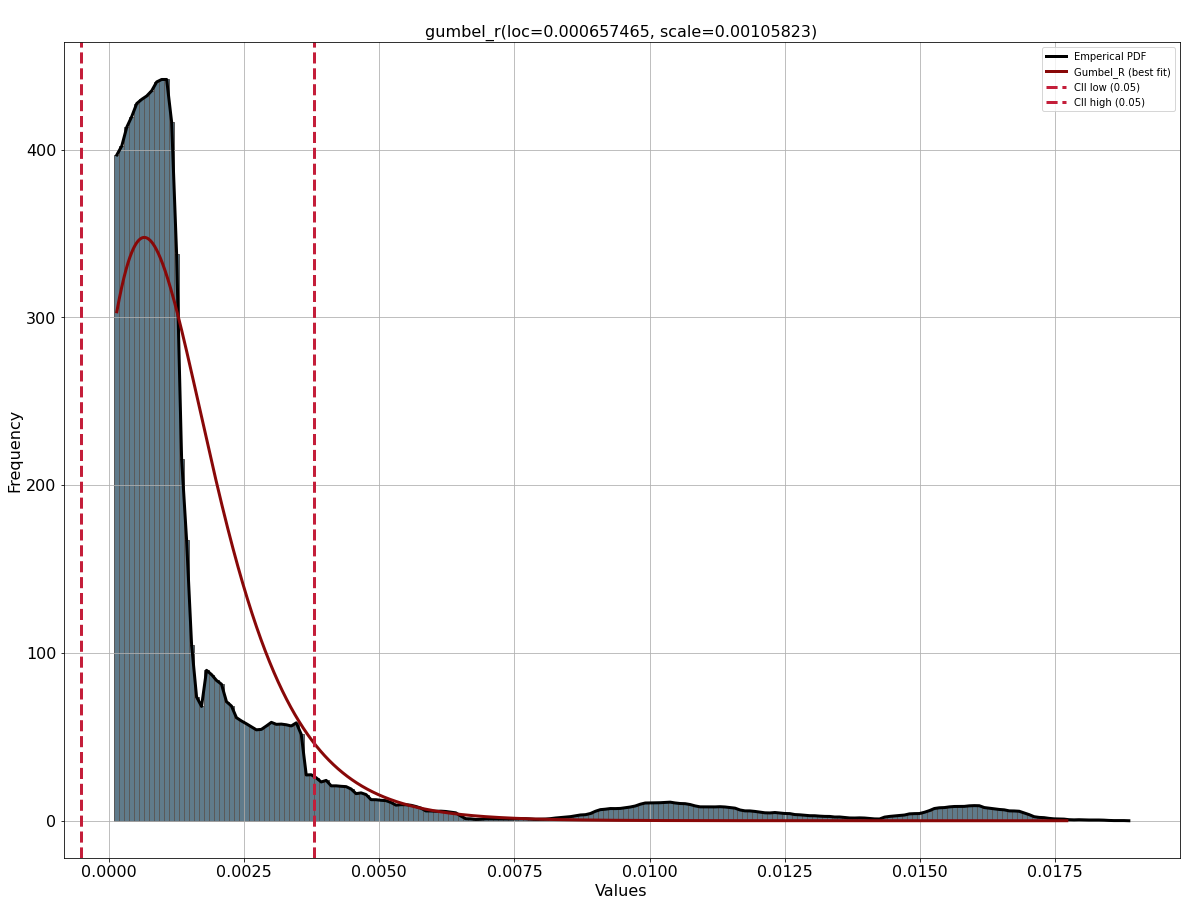

In [38]:
from distfit import distfit
dfit = distfit(smooth=20,distr=['genextreme','gumbel_r'])  
X=np.exp(-animal['emergence_high'].values)
dfit.fit_transform(X) 
dfit.plot()

In [19]:
X

array([2281.86047218, 2281.86047218, 2281.86047218, ...,   21.1149223 ,
         21.02583643,   19.77496807])

In [24]:
np.exp(-animal['emergence'].values)

array([0.00043824, 0.00043824, 0.00043824, ..., 0.04735987, 0.04756053,
       0.05056898])

In [40]:
collapseddf=pd.read_csv('../../paper_data_v1/irat_qnet/results/animal_predictions/allriskystrains_collapsed.csv')
collapseddf.columns

Index(['id', 'subtype', 'ha_accession', 'na_accession', 'impact_risk',
       'emergence_risk'],
      dtype='object')

<AxesSubplot:xlabel='emergence_risk', ylabel='Count'>

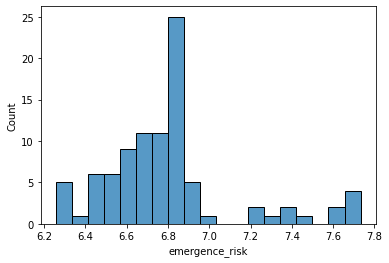

In [43]:
sns.histplot(collapseddf.emergence_risk)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [norm] [0.00 sec] [RSS: 4.82822] [loc=6.796 scale=0.327]
[distfit] >INFO> [t   ] [0.19 sec] [RSS: 4.01166] [loc=6.828 scale=0.268]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:6.827549, scale:0.268210)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt(df=4.51979, loc=6.82755, scale=0.26821)'}, xlabel='Values', ylabel='Frequency'>)

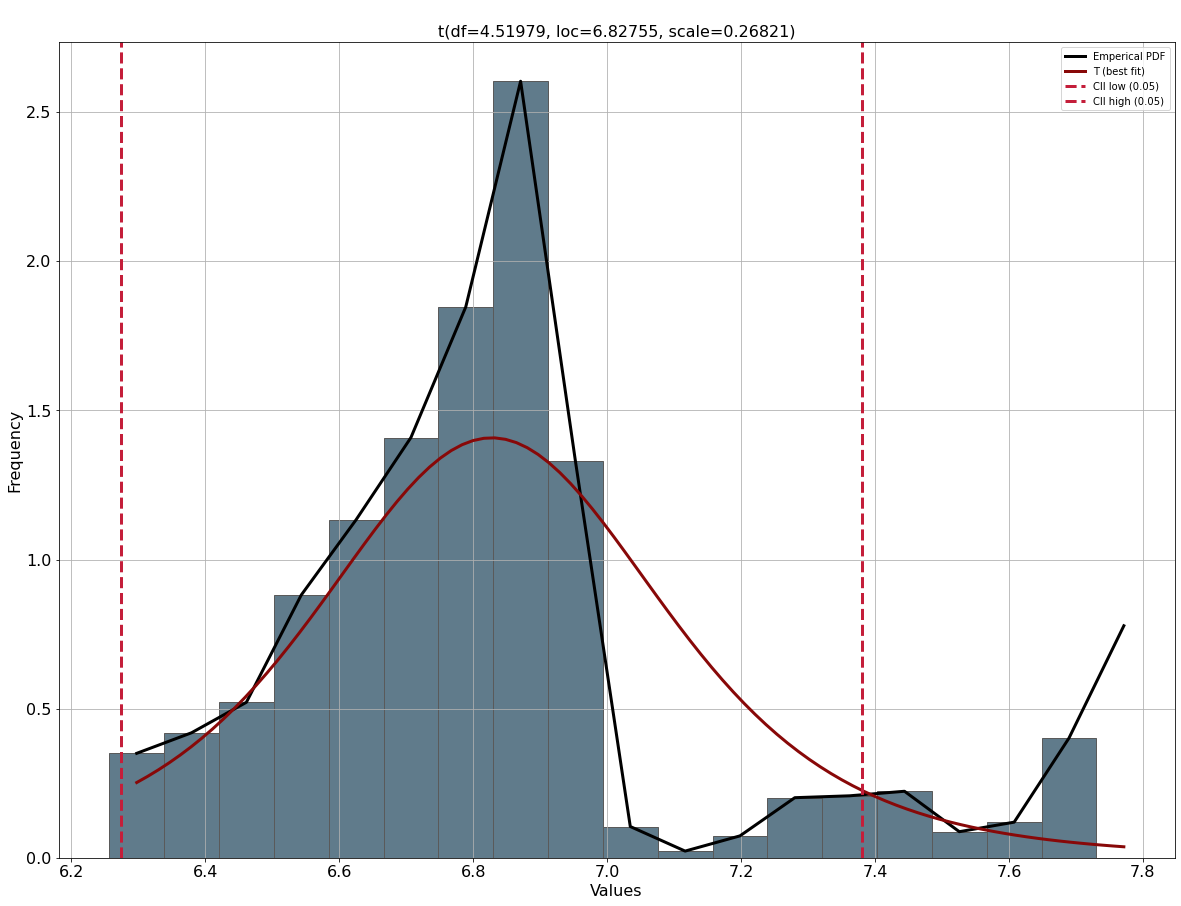

In [48]:
dfitc = distfit(smooth=2,distr=['norm','t'])  
dfitc.fit_transform(collapseddf.emergence_risk) 
dfitc.plot()

[distfit] >INFO> fit
[distfit] >ERROR> [normal] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [genextreme] [0.16 sec] [RSS: 1.60902] [loc=6.278 scale=0.548]
[distfit] >INFO> [gumbel_r  ] [0.00 sec] [RSS: 3.02735] [loc=6.175 scale=0.566]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Genextreme(loc:6.277638, scale:0.547593)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngenextreme(c=0.34319, loc=6.27764, scale=0.547593)'}, xlabel='Values', ylabel='Frequency'>)

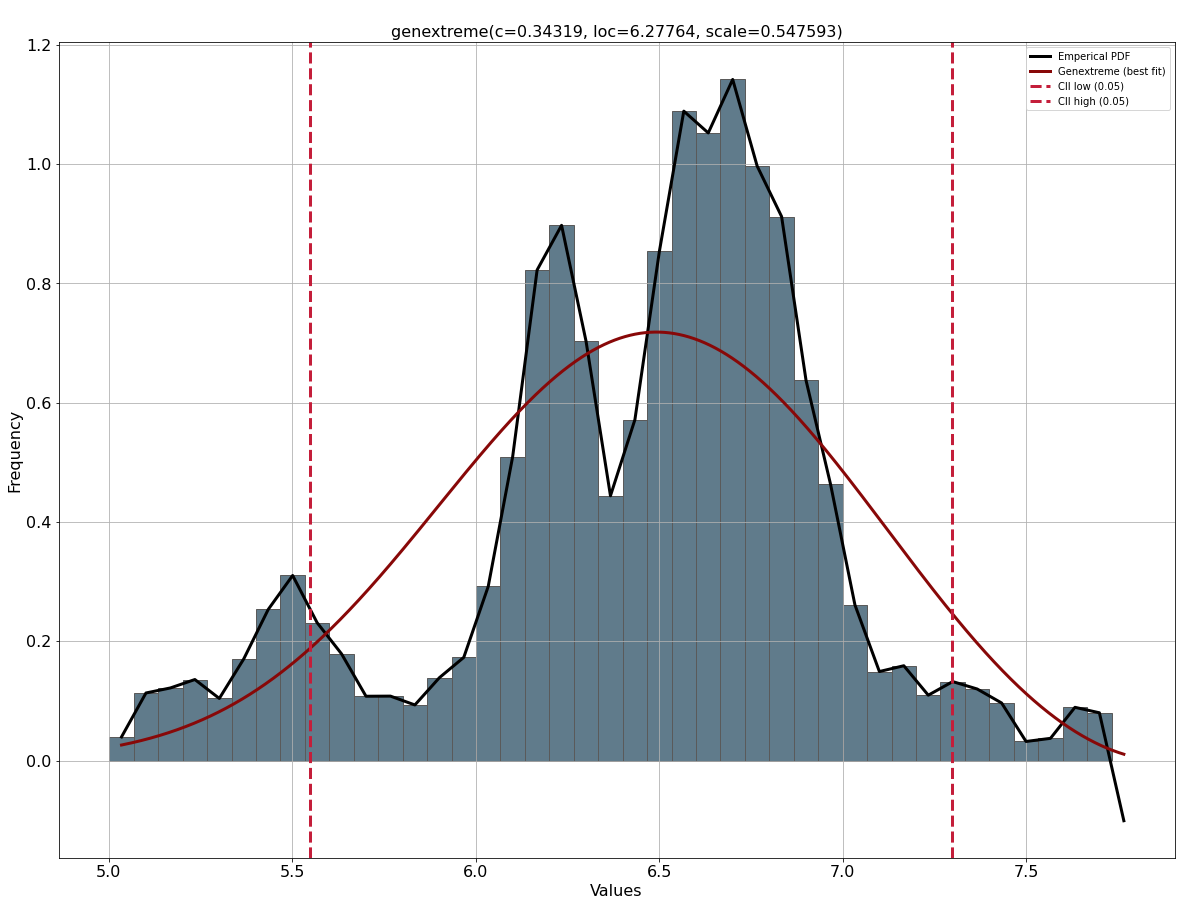

In [59]:
from distfit import distfit
dfit = distfit(distr=['normal','genextreme','gumbel_r'],smooth=3)  
X=(animal['emergence'].values)
#X=X[X<7]
X=X[X>5]
dfit.fit_transform(X) 
dfit.plot()

[7.008117777650588, 7.32532570481639]

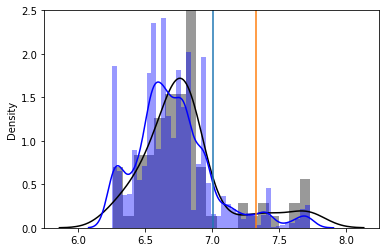

In [112]:
ax=sns.distplot(collapseddf.emergence_risk.values,norm_hist=True,color='#000000')
X=animal['emergence'].values
X=X[X>6.25]
sns.distplot(X,ax=ax,norm_hist=True,color='b')
ylim=ax.get_ylim()
Q=[np.quantile(collapseddf.emergence_risk.values,q=x) for x in [.87,.9]]
ax.plot([Q[0],Q[0]],ylim)
ax.plot([Q[1],Q[1]],ylim)
ax.set_ylim(ylim[0],2.5)
Q
#import tikzplotlib
#tikzplotlib.save("../../tex/overleaf3/Figures/straindist.tex")


In [84]:
np.quantile(collapseddf.emergence_risk.values,q=.95)

7.615906891935861

In [93]:
[Q[0],Q[0]]

[6.866348677958663, 6.866348677958663]